In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

print("Train x",  train_x.shape)
print("Test x",  test_x.shape)
print("Train y",  train_y.shape)
print("Test y",  test_y.shape)

Train x (60000, 28, 28)
Test x (10000, 28, 28)
Train y (60000,)
Test y (10000,)


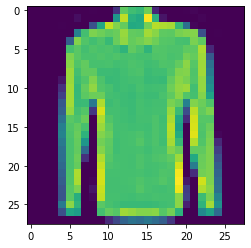

In [4]:
# Show one of the images from the training dataset
plt.imshow(train_x[40])

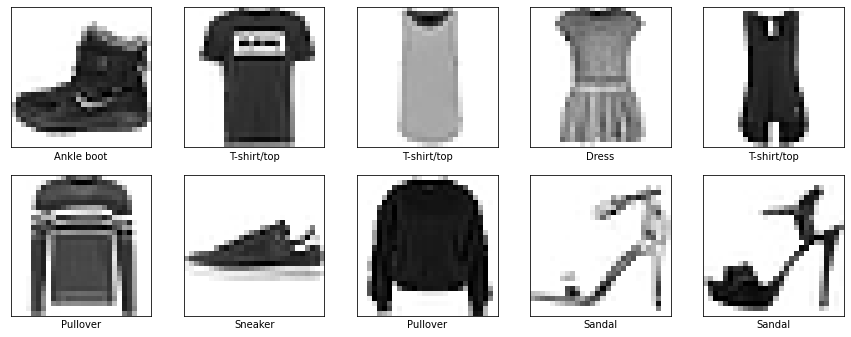

In [5]:
#Labeling the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Display first 10 images
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])

In [6]:
#Normalize Data
train_x = train_x / 255
test_x = test_x / 255
print("Shape before reshaping", train_x.shape, test_x.shape)

#Reshape Data
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
print("Shape after reshaping", train_x.shape, test_x.shape)

#One hot encoding
from keras.utils import to_categorical
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

Shape before reshaping (60000, 28, 28) (10000, 28, 28)
Shape after reshaping (60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=13)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [8]:
from keras.models import Input, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [9]:
def fash_mnist(hyperP):
    try:
        modelH = Sequential()
        for i in range(0, len(hyperP["Layers"])):
            modelH.add(hyperP["Layers"][i])
        opt = hyperP["opt"]
        modelH.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        modelH.summary()
    
    except Exception as ke:
        print("Key is not defined", ke)
        model=None
 
    finally:
        return modelH


In [10]:
num_classes = 10
HyperParam1 = {
       
 #Training Level Hyper Params
    "epochs": 10,
    "batchSize": 2000,
    "opt": keras.optimizers.Adam,
    #Network Level HyperParam

    "Layers" : 
        [
        Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1),padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D((2, 2),padding='same'),
        Dropout(0.3),
        Conv2D(64, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2),padding='same'),
        Conv2D(128, (3, 3), activation='linear', padding='same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size=(2, 2),padding='same'),
        Flatten(),
        Dense(128, activation='linear'),
        LeakyReLU(alpha=0.1),
        Dense(num_classes, activation='softmax'),]    
}
newModel1 = fash_mnist(HyperParam1)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
____________________

In [11]:
history = newModel1.fit(x_train, y_train, batch_size=HyperParam1['batchSize'], epochs=HyperParam1['epochs'], verbose = 1, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 38400 samples, validate on 9600 samples
Epoch 1/5





38400/38400 [==============================] - 79s 2ms/step - loss: 1.4035 - acc: 0.4939 - val_loss: 0.9440 - val_acc: 0.6221
Epoch 2/5
38400/38400 [==============================] - 75s 2ms/step - loss: 0.7858 - acc: 0.7062 - val_loss: 0.6859 - val_acc: 0.7473
Epoch 3/5
38400/38400 [==============================] - 75s 2ms/step - loss: 0.6316 - acc: 0.7683 - val_loss: 0.5714 - val_acc: 0.8008
Epoch 4/5
38400/38400 [==============================] - 77s 2ms/step - loss: 0.5385 - acc: 0.8036 - val_loss: 0.4932 - val_acc: 0.8279
Epoch 5/5
38400/38400 [==============================] - 78s 2ms/step - loss: 0.4782 - acc: 0.8278 - val_loss: 0.4456 - val_acc: 0.8435


In [12]:
#Train - Accuracy & Loss
train_loss, train_acuracy =newModel1.evaluate(x_train, y_train, verbose=1)
print ("Train Loss: ",train_loss, "Train Accuracy: ",train_acuracy)

#Test - Accuracy & Loss
test_loss, test_acc = newModel1.evaluate(x_test, y_test, verbose=1)
print ("Test Loss: ", test_loss, "Test Accuracy: ", test_acc)

48000/48000 [==============================] - 35s 729us/step
Train Loss:  0.4447900740802288 Train Accuracy:  0.8430208333333333
12000/12000 [==============================] - 9s 718us/step
Test Loss:  0.4648197470108668 Test Accuracy:  0.8328333333333333


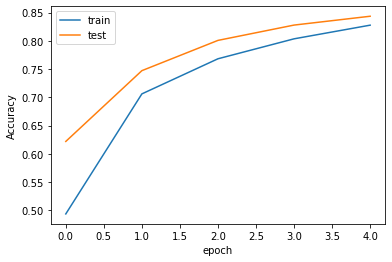

In [13]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='upper left')

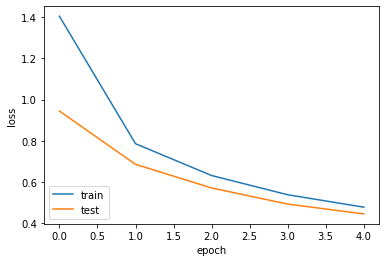

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='lower left')

In [15]:
pred=newModel1.predict(x_test)

In [16]:
pred = np.argmax(np.round(pred),axis=1)
pred

array([2, 7, 5, ..., 6, 6, 7], dtype=int64)

In [17]:
# Saving best model using Keras Callback 
cb = [keras.callbacks.ModelCheckpoint(filepath="my_modBiLSTM_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),]

In [18]:
newModel1.fit(x_train, y_train, batch_size=HyperParam1['batchSize'], epochs=HyperParam1['epochs'], verbose = 1, validation_split=0.2, callbacks=cb)

Train on 38400 samples, validate on 9600 samples
Epoch 1/5
38400/38400 [==============================] - 74s 2ms/step - loss: 0.4456 - acc: 0.8384 - val_loss: 0.4166 - val_acc: 0.8523
Epoch 2/5
38400/38400 [==============================] - 70s 2ms/step - loss: 0.4260 - acc: 0.8458 - val_loss: 0.3868 - val_acc: 0.8659
Epoch 3/5
38400/38400 [==============================] - 79s 2ms/step - loss: 0.3881 - acc: 0.8604 - val_loss: 0.3735 - val_acc: 0.8699
Epoch 4/5
38400/38400 [==============================] - 68s 2ms/step - loss: 0.3747 - acc: 0.8654 - val_loss: 0.3610 - val_acc: 0.8752
Epoch 5/5
38400/38400 [==============================] - 71s 2ms/step - loss: 0.3594 - acc: 0.8708 - val_loss: 0.3429 - val_acc: 0.8797


In [19]:
#Train - Accuracy & Loss
train_loss, train_acuracy =newModel1.evaluate(x_train, y_train, verbose=1)
print ("Train Loss: ",train_loss, "Train Accuracy: ",train_acuracy)

#Test - Accuracy & Loss
test_loss, test_acc = newModel1.evaluate(x_test, y_test, verbose=1)
print ("Test Loss: ", test_loss, "Test Accuracy: ", test_acc)

48000/48000 [==============================] - 35s 735us/step
Train Loss:  0.33839200470844905 Train Accuracy:  0.8793125
12000/12000 [==============================] - 8s 682us/step
Test Loss:  0.3628753658930461 Test Accuracy:  0.8724166666666666
